In [2]:
import os 
import pandas as pd
import numpy as np
from glob import glob
from tqdm import tqdm
import cv2


import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanAbsoluteError

In [47]:
main_path = "C:/Users/skmoon/Desktop/DACON_GROWTH"
train_imgs = glob(main_path+"/train/*/*/*.png") + glob(main_path+"/train/*/*/*.jpg")
train_imgs = sorted(train_imgs)
test_imgs = glob(main_path+"/test/image/*.png") + glob(main_path+"/test/image/*.jpg")
test_imgs = sorted(test_imgs)
train_data = glob(main_path+"/train/*/meta/*.csv")
train_label = glob(main_path+"/train/*/*.csv")
test_data = glob(main_path+"/test/meta/*.csv")
preprocessing_train_imgs = "C:/Users/skmoon/Desktop/DACON_GROWTH/PREPROCESSING-TRAIN"
preprocessing_test_imgs = "C:/Users/skmoon/Desktop/DACON_GROWTH/PREPROCESSING-TEST"
if not os.path.exists(preprocessing_train_imgs):
    os.mkdir(preprocessing_train_imgs)
if not os.path.exists(preprocessing_test_imgs):
    os.mkdir(preprocessing_test_imgs)

In [4]:
for i in tqdm(train_imgs):
    name = i.split("\\")[-1]
    img = cv2.imread(i, cv2.IMREAD_COLOR)
    img = cv2.resize(img, dsize=(512, 512), interpolation=cv2.INTER_AREA)
    cv2.imwrite(os.path.join(preprocessing_train_imgs,name), img)

for i in tqdm(test_imgs):
    name = i.split("\\")[-1]
    img = cv2.imread(i, cv2.IMREAD_COLOR)
    img = cv2.resize(img, dsize=(512, 512), interpolation=cv2.INTER_AREA)
    cv2.imwrite(os.path.join(preprocessing_test_imgs,name), img)

100%|██████████| 460/460 [02:12<00:00,  3.48it/s]


In [ ]:
# Train data with every unit

train_df = []
for i in tqdm(train_data):
    name = i.split("\\")[-1].split(".")[0]
    df = pd.read_csv(i)
    df["이미지"] = name
    case = name.split("_")[0]
    label = pd.read_csv(f"C:/Users/skmoon/Desktop/DACON_GROWTH/train/{case}/label.csv")
    label_name = [i.split(".")[0] for i in label.img_name]
    label.img_name = label_name
    leaf_weight = label[label.img_name == name].leaf_weight.values[0]
    df["무게"] = leaf_weight
    df["화이트 LED동작강도"] = df["화이트 LED동작강도"].fillna(method='bfill', limit=1)
    df["화이트 LED동작강도"] = df["화이트 LED동작강도"].fillna(method='ffill', limit=1)
    df["레드 LED동작강도"] = df["레드 LED동작강도"].fillna(method='bfill', limit=1)
    df["레드 LED동작강도"] = df["레드 LED동작강도"].fillna(method='ffill', limit=1)
    df["블루 LED동작강도"] = df["블루 LED동작강도"].fillna(method='bfill', limit=1)
    df["블루 LED동작강도"] = df["블루 LED동작강도"].fillna(method='ffill', limit=1)
    df["최근분무량"] = df["최근분무량"].fillna(method='bfill', limit=1)
    df["최근분무량"] = df["최근분무량"].fillna(method='ffill', limit=1)
    df = df.interpolate()
    df = df.fillna(0.0)
    '''
    정량이 정해져 있음 bbfill, ffill (LED, 분무량)
    정량이 정해져 있지 않음 interpolate (그외)
    '''
    train_df.append(df)

train_df = pd.concat(train_df, ignore_index=True)
train_df.to_csv('train_data.csv', index=False)

In [3]:
# Train data with mean unit

train_df = []
for i, j in tqdm(zip(train_data, train_imgs)):
    name = i.split("\\")[-1].split(".")[0]
    df = pd.read_csv(i)
    df = df.drop('시간', axis = 1)
    df["이미지"] = name
    case = name.split("_")[0]
    label = pd.read_csv(f"C:/Users/skmoon/Desktop/DACON_GROWTH/train/{case}/label.csv")
    label_name = [i.split(".")[0] for i in label.img_name]
    label.img_name = label_name
    leaf_weight = label[label.img_name == name].leaf_weight.values[0]
    df["무게"] = leaf_weight
    df["화이트 LED동작강도"] = df["화이트 LED동작강도"].fillna(method='bfill', limit=1)
    df["화이트 LED동작강도"] = df["화이트 LED동작강도"].fillna(method='ffill', limit=1)
    df["레드 LED동작강도"] = df["레드 LED동작강도"].fillna(method='bfill', limit=1)
    df["레드 LED동작강도"] = df["레드 LED동작강도"].fillna(method='ffill', limit=1)
    df["블루 LED동작강도"] = df["블루 LED동작강도"].fillna(method='bfill', limit=1)
    df["블루 LED동작강도"] = df["블루 LED동작강도"].fillna(method='ffill', limit=1)
    df["최근분무량"] = df["최근분무량"].fillna(method='bfill', limit=1)
    df["최근분무량"] = df["최근분무량"].fillna(method='ffill', limit=1)
    df = df.interpolate()
    df = df.fillna(0.0)
    '''
    정량이 정해져 있음 bbfill, ffill (LED, 분무량)
    정량이 정해져 있지 않음 interpolate (그외)
    '''
    df = df.mean()
    df = df.to_frame().T

    train_df.append(df)

train_df = pd.concat(train_df, ignore_index=True)
train_df.to_csv('train_data.csv', index=False)
train_df.head()

NameError: name 'train_data' is not defined

In [50]:
test_df = []
for i, j in tqdm(zip(test_data, test_imgs)):
    name = i.split("\\")[-1].split(".")[0]
    df = pd.read_csv(i)
    df = df.drop('시간', axis = 1)
    df["화이트 LED동작강도"] = df["화이트 LED동작강도"].fillna(method='bfill', limit=1)
    df["화이트 LED동작강도"] = df["화이트 LED동작강도"].fillna(method='ffill', limit=1)
    df["레드 LED동작강도"] = df["레드 LED동작강도"].fillna(method='bfill', limit=1)
    df["레드 LED동작강도"] = df["레드 LED동작강도"].fillna(method='ffill', limit=1)
    df["블루 LED동작강도"] = df["블루 LED동작강도"].fillna(method='bfill', limit=1)
    df["블루 LED동작강도"] = df["블루 LED동작강도"].fillna(method='ffill', limit=1)
    df["최근분무량"] = df["최근분무량"].fillna(method='bfill', limit=1)
    df["최근분무량"] = df["최근분무량"].fillna(method='ffill', limit=1)
    df = df.interpolate()
    df = df.fillna(0.0)

    df = df.mean()
    df = df.to_frame().T
    df["이미지"] = j.split("\\")[-1]

    test_df.append(df)
    
test_df = pd.concat(test_df, ignore_index=True)
test_df.head()

460it [00:09, 50.73it/s]


내부온도관측치    외부온도관측치    내부습도관측치    외부습도관측치      CO2관측치     EC관측치  \
0  23.634861  22.564583  69.500486  34.499792  400.265278  0.000000   
1  27.170347  28.738472  63.881805  50.837708  505.823611  0.000000   
2  25.999340  25.541111  79.197812  65.936597  498.623611  1.778872   
3  22.956944  22.361667  70.809792  45.378646  394.612500  0.592409   
4  23.014757  22.531736  73.886944  33.534167  418.561806  0.541303   

         최근분무량  화이트 LED동작강도  레드 LED동작강도  블루 LED동작강도       냉방온도       냉방부하  \
0  6120.690250    47.193750    7.484722   13.486806  22.395829   6.198268   
1   650.293681    33.498611    9.508333    4.722222  23.396007  23.875345   
2   110.823069    47.191667    7.487500   13.477083  20.291920  42.908664   
3  6324.772167    47.187500    7.483333   13.479167  22.395793   2.911434   
4  6478.004611    47.188194    7.465972   13.478472  22.395846   3.179260   

        난방온도      난방부하       총추정광량     백색광추정광량    적색광추정광량    청색광추정광량      이미지  
0  20.395829  0.000000  179.576697  146.045817  12.398359  21.132520  001.png  
1  22.396007  0.000000  126.724400  103.602930  15.725197   7.396273  002.png  
2  17.416844  0.606961  179.532997  146.026479  12.390315  21.116202  003.png  
3  20.395793  0.000000  179.449739  145.950201  12.392039  21.107500  004.png  
4  20.395846  0.000000  179.480870  145.998546  12.365033  21.117290  005.png

In [5]:
exc = ["시간", "이미지"]
for c in train_df.columns:
    if not c in exc:
        train_df[c] = train_df[c].astype("float32")
for c in test_df.columns:
    if not c in exc:
        test_df[c] = test_df[c].astype("float32")

In [6]:
%%time
train_df.to_parquet("C:/Users/skmoon/Desktop/DACON_GROWTH/train.parquet", index=False)
test_df.to_parquet("C:/Users/skmoon/Desktop/DACON_GROWTH/test.parquet", index=False)

CPU times: total: 46.9 ms
Wall time: 193 ms


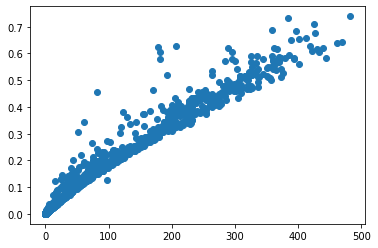

1592
460


In [51]:
# importing libraries
import cv2
import numpy as np
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt

# image = cv2.imread('1.jpg')
# image = cv2.resize(image,(410,308))
# result = image.copy()
# image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
# lower = np.array([22,0,0])
# upper = np.array([95,255,245])
# mask = cv2.inRange(image, lower, upper)
# number_of_white_pix = np.sum(mask == 255)
# number_of_black_pix = np.sum(mask == 0)
# result = cv2.bitwise_and(result, result, mask=mask)

# print('Number of white pixels:', number_of_white_pix)
# print('Number of black pixels:', number_of_black_pix)

# cv2.imshow('mask', mask)
# cv2.imshow('result', result)
# cv2.waitKey()

def get_train_data(data_dir):
    label_list = []
    ratio_list = []
    image_name = []
    for case_name in os.listdir(data_dir):
        current_path = os.path.join(data_dir, case_name)
        if os.path.isdir(current_path):
            # get image pat

            # get label
            label_df = pd.read_csv(current_path+'/label.csv')
            label_list.extend(label_df['leaf_weight'])
            

        for file in os.listdir(os.path.join(data_dir, case_name, 'image')):

                image_path= os.path.join(data_dir, case_name, 'image', file)
                image = cv2.imread(image_path)
                image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
                lower = np.array([22,40,0])
                upper = np.array([85,255,245])
                mask = cv2.inRange(image, lower, upper)
                number_of_white_pix = np.sum(mask == 255)
                number_of_black_pix = np.sum(mask == 0)
                ratio = number_of_white_pix / (number_of_white_pix + number_of_black_pix)
                ratio_list.append(ratio)
                image_name.append(image_path.split("\\")[-1])

    return label_list, ratio_list, image_name

label, ratio_train, name = get_train_data('./dataset/train')

def get_test_data(data_dir):
    ratio_list = []
    for file in os.listdir(data_dir):

        image_path = os.path.join(data_dir, file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
        lower = np.array([22,40,0])
        upper = np.array([85,255,245])
        mask = cv2.inRange(image, lower, upper)
        number_of_white_pix = np.sum(mask == 255)
        number_of_black_pix = np.sum(mask == 0)
        ratio = number_of_white_pix / (number_of_white_pix + number_of_black_pix)
        ratio_list.append(ratio)
        # result = cv2.GaussianBlur(result,(5,5),0)
    return ratio_list

ratio_test = get_test_data('./dataset/test/image')

# data = {'weight' : label , 'ratio' : ratio, 'name' : name}


# df = pd.DataFrame(data = data)
# print(df)
# df.plot(x ='weight', y='ratio', kind = 'scatter')
# plt.show()

fig, ax = plt.subplots()
ax.scatter(label, ratio_train)

# for i, txt in enumerate(name):
#     ax.annotate(txt, (label[i], ratio[i]))

plt.show()
print(len(ratio_train))
print(len(ratio_test))

In [52]:
train_df['비율'] = ratio_train

test_df['비율'] = ratio_test

train_df = train_df[train_df.최근분무량 != 0]

In [53]:
outliers = ['CASE23_01.jpg', 'CASE23_02.jpg', 'CASE23_03.jpg', 'CASE23_04.jpg', 'CASE23_05.jpg', 'CASE23_06.jpg', 'CASE23_07.jpg', 'CASE23_08.jpg', 'CASE23_09.jpg', 'CASE73_10.png'
,'CASE73_02.png', 'CASE73_14.png', 'CASE45_16.png', 'CASE45_17.png', 'CASE17_02.jpg', 'CASE59_01.png','CASE59_02.png','CASE59_03.png','CASE59_04.png','CASE59_05.png','CASE59_06.png',
'CASE59_07.png','CASE59_08.png','CASE59_09.png','CASE59_10.png','CASE59_11.png','CASE59_12.png','CASE59_13.png','CASE59_14.png','CASE59_15.png','CASE59_16.png','CASE59_17.png','CASE59_18.png',
'CASE59_19.png','CASE59_20.png','CASE59_21.png','CASE59_22.png','CASE59_23.png','CASE59_24.png','CASE59_25.png','CASE59_26.png','CASE59_27.png','CASE59_28.png','CASE59_29.png','CASE59_30.png',
'CASE59_31.png','CASE59_32.png', 'CASE59_33.png', 'CASE05_21.png','CASE05_22.png','CASE05_23.png', 'CASE09_08.jpg', 'CASE16_03.jpg', 'CASE31_06.jpg', 'CASE31_07.jpg', 'CASE07_07.jpg',
'CASE07_08.jpg','CASE72_06.png']

train_df = train_df[~train_df['이미지'].isin(outliers)]

len(train_df)

# CASE 23 (Delete All) (Underweighted)
# CASE 73_10, 14, 2 (Cropped next day)
# CASE 45_16, 17 (Equipment fault, Underweighted)
# CASE 17_02 (Sudden weight decrease)
# CASE 59 (Delete All) (Duplicate)
# CASE 05_21, 22, 23 (Inconsistent weight)
# CASE 9_8 (Sudden weight decrease)
# CASE 16_3 (Underweighted)
# CASE 31_6, 7 (Sudden weight decrease)
# CASE 7_7, 8 (Sudden weight decrease)
# CASE 72_06 (Cropped next day)



1281

In [69]:
import pandas as pd
import lightgbm as lgb
from sklearn.model_selection import train_test_split
# train_df = pd.read_parquet("C:/Users/skmoon/Desktop/DACON_GROWTH/train.parquet")
# test_df = pd.read_parquet("C:/Users/skmoon/Desktop/DACON_GROWTH/test.parquet")

# train_df = pd.read_csv("C:/Users/skmoon/Desktop/DACON_GROWTH/train.csv", encoding='cp949')

# features = ['내부온도관측치', '외부온도관측치', '내부습도관측치', '외부습도관측치', 'CO2관측치', 'EC관측치',
#         '최근분무량', '화이트 LED동작강도', '레드 LED동작강도', '블루 LED동작강도', '냉방온도', '냉방부하',
#         '난방온도', '난방부하', '총추정광량', '백색광추정광량', '적색광추정광량', '청색광추정광량']

features = ['내부온도관측치', '외부온도관측치', '내부습도관측치', '외부습도관측치', 'CO2관측치', 'EC관측치',
         '최근분무량', '냉방온도', '냉방부하',
         '난방온도', '난방부하', '백색광추정광량', '적색광추정광량', '청색광추정광량', '비율']
       

train_col = train_df[features]

test_col = test_df[features]

train_target = train_df["무게"]

In [55]:
train_df_corr = train_df.corr()['무게']
train_df_corr = pd.DataFrame(train_df_corr.sort_values(ascending=False), columns=['무게'])
train_df_corr.style.background_gradient(cmap='viridis')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# train_df.plot(subplots=True, layout=(4,5), figsize=(40,30))

# plt.tight_layout()

# ax1 = train_df.plot.scatter(x='백색광추정광량',
#                       y='화이트 LED동작강도',
#                       c='DarkBlue')

combined = train_df['백색광추정광량'] + train_df['적색광추정광량'] + train_df['청색광추정광량']
total = train_df['총추정광량']

plt.plot(combined, total)

corr = train_df.corr()

corr.style.background_gradient(cmap='coolwarm')


TypeError: list indices must be integers or slices, not str

In [84]:
train_df_corr[abs(train_df_corr['무게'])>=0.2].index

Index(['무게', '비율', '레드 LED동작강도', '적색광추정광량', '내부습도관측치', '난방부하', '백색광추정광량',
       '화이트 LED동작강도'],
      dtype='object')

0:	learn: 82.7091824	test: 83.7949429	best: 83.7949429 (0)	total: 5.96ms	remaining: 4m 57s
1:	learn: 82.0255569	test: 83.1343519	best: 83.1343519 (1)	total: 9.39ms	remaining: 3m 54s
2:	learn: 81.3564372	test: 82.4530614	best: 82.4530614 (2)	total: 12.6ms	remaining: 3m 30s
3:	learn: 80.6158424	test: 81.7095278	best: 81.7095278 (3)	total: 16.3ms	remaining: 3m 23s
4:	learn: 79.9585977	test: 81.0743810	best: 81.0743810 (4)	total: 20.8ms	remaining: 3m 27s
5:	learn: 79.2598667	test: 80.3768866	best: 80.3768866 (5)	total: 24.2ms	remaining: 3m 21s
6:	learn: 78.5295975	test: 79.6441672	best: 79.6441672 (6)	total: 27.5ms	remaining: 3m 16s
7:	learn: 77.9022113	test: 79.0303941	best: 79.0303941 (7)	total: 32.5ms	remaining: 3m 23s
8:	learn: 77.2035342	test: 78.3154856	best: 78.3154856 (8)	total: 35.7ms	remaining: 3m 18s
9:	learn: 76.5522391	test: 77.6445438	best: 77.6445438 (9)	total: 38.8ms	remaining: 3m 13s
10:	learn: 75.8893391	test: 77.0207489	best: 77.0207489 (10)	total: 41.8ms	remaining: 3m 1

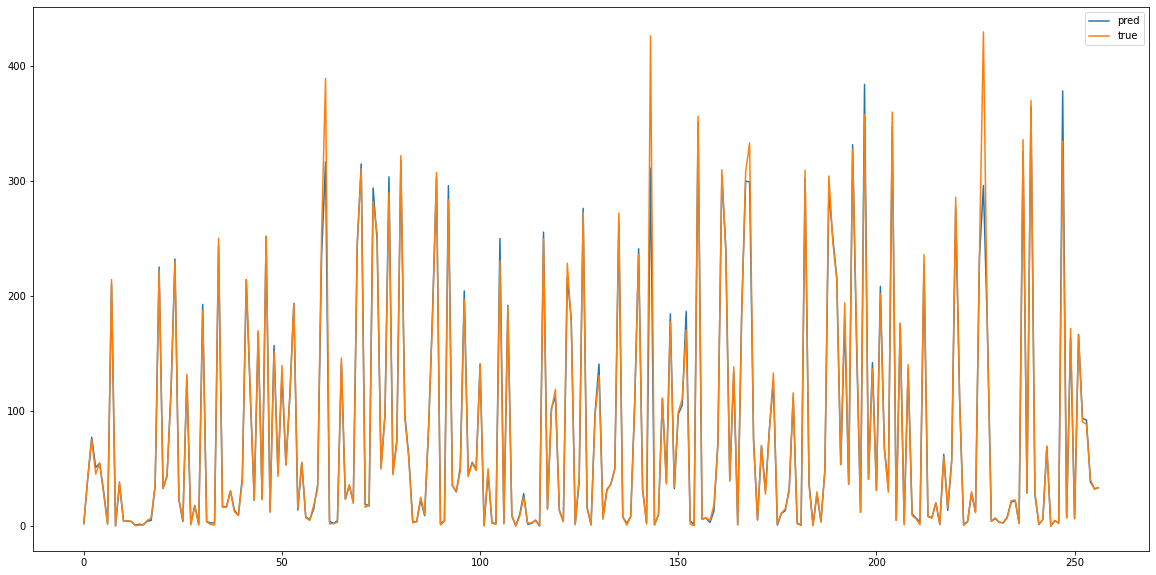

In [85]:
# catboost for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from catboost import CatBoostRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from matplotlib import pyplot

train_x, val_x, train_y, val_y = train_test_split(train_col, train_target, test_size=0.2, random_state=32)

model = CatBoostRegressor(verbose=1, n_estimators=50000,  eval_metric='MAE', learning_rate = 0.01)
model.fit(train_x, train_y, eval_set=[(val_x, val_y)],
                   use_best_model=True)

val_pred = model.predict(val_x)
plt.figure(figsize=(20,10))
plt.plot(np.array(val_pred),label = "pred")
plt.plot(np.array(val_y),label = "true")
plt.legend()
plt.show()

# mae
# print("MAE: ",mean_absolute_error(val_y, val_pred))

In [75]:
# Multiple Regression 
import statsmodels.api as sm

train_x, val_x, train_y, val_y = train_test_split(train_col, train_target, test_size=0.2, random_state=32)

train_x = sm.add_constant(train_x)
val_x = sm.add_constant(val_x)

model = sm.OLS(train_y, train_x).fit()
model.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     무게   R-squared:                       0.988
Model:                            OLS   Adj. R-squared:                  0.987
Method:                 Least Squares   F-statistic:                     5340.
Date:                Tue, 17 May 2022   Prob (F-statistic):               0.00
Time:                        16:43:31   Log-Likelihood:                -3970.9
No. Observations:                1024   AIC:                             7974.
Df Residuals:                    1008   BIC:                             8053.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3457      6.622      1.411      0.158      -3.648      22.340
내부온도관측치       -0.6894      0.831     -0.829      0.407      -2.320       0.942
외부온도관측치        0.9172      0.362      2.534      0.011       0.207       1.628
내부습도관측치       -0.9180      0.059    -15.683      0.000      -1.033      -0.803
외부습도관측치        0.4089      0.039     10.424      0.000       0.332       0.486
CO2관측치         0.0220      0.006      3.685      0.000       0.010       0.034
EC관측치         -1.3422      0.602     -2.229      0.026      -2.524      -0.161
최근분무량          0.0003      0.000      1.871      0.062   -1.61e-05       0.001
냉방온도           2.3964      0.612      3.915      0.000       1.195       3.598
냉방부하          -0.1100      0.162     -0.679      0.497      -0.428       0.208
난방온도          -2.3471      0.721     -3.255      0.001      -3.762      -0.932
난방부하          -0.1074      0.235     -0.456      0.648      -0.569       0.354
백색광추정광량        0.0362      0.012      3.128      0.002       0.013       0.059
적색광추정광량       -0.1590      0.043     -3.739      0.000      -0.242      -0.076
청색광추정광량        0.0701      0.033      2.106      0.035       0.005       0.135
비율           646.7209      2.828    228.699      0.000     641.172     652.270
==============================================================================
Omnibus:                      172.921   Durbin-Watson:                   1.989
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1818.365
Skew:                           0.417   Prob(JB):                         0.00
Kurtosis:                       9.475   Cond. No.                     5.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

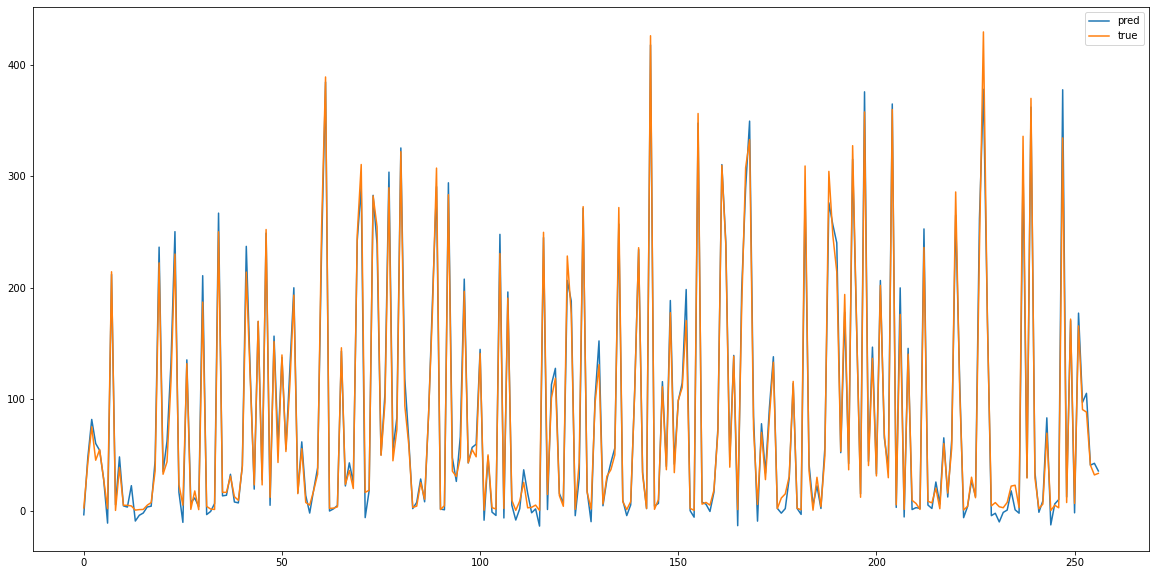

MAE:  7.709366887241441


In [76]:
from sklearn.metrics import mean_absolute_error

val_pred = model.predict(val_x)
plt.figure(figsize=(20,10))
plt.plot(np.array(val_pred),label = "pred")
plt.plot(np.array(val_y),label = "true")
plt.legend()
plt.show()

print("MAE: ",mean_absolute_error(val_y, val_pred))

In [78]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = train_col.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(train_col.values, i)
                          for i in range(len(train_col.columns))]
  
print(vif_data)

    feature          VIF
0   내부온도관측치  3607.786743
1   외부온도관측치   640.466753
2   내부습도관측치    96.056342
3   외부습도관측치    21.723976
4    CO2관측치    65.624034
5     EC관측치     6.691543
6     최근분무량     1.999821
7      냉방온도  1387.694365
8      냉방부하   149.505665
9      난방온도  1771.877347
10     난방부하     7.347553
11  백색광추정광량    18.198242
12  적색광추정광량     7.482777
13  청색광추정광량     6.323784
14       비율     2.769440


[LightGBM] [Warning] early_stopping_round is set=1000, early_stopping_rounds=1000 will be ignored. Current value: early_stopping_round=1000
[1]	valid_0's l1: 84.0318	valid_0's l2: 11080
[2]	valid_0's l1: 83.6135	valid_0's l2: 10970.2
[3]	valid_0's l1: 83.1979	valid_0's l2: 10861.7
[4]	valid_0's l1: 82.7839	valid_0's l2: 10754.1
[5]	valid_0's l1: 82.3724	valid_0's l2: 10647.8
[6]	valid_0's l1: 81.9628	valid_0's l2: 10542.3
[7]	valid_0's l1: 81.5554	valid_0's l2: 10438.1
[8]	valid_0's l1: 81.1495	valid_0's l2: 10334.7
[9]	valid_0's l1: 80.7467	valid_0's l2: 10232.6
[10]	valid_0's l1: 80.3449	valid_0's l2: 10131.2
[11]	valid_0's l1: 79.9457	valid_0's l2: 10031.2
[12]	valid_0's l1: 79.5477	valid_0's l2: 9931.81
[13]	valid_0's l1: 79.1518	valid_0's l2: 9833.66
[14]	valid_0's l1: 78.758	valid_0's l2: 9736.31
[15]	valid_0's l1: 78.3661	valid_0's l2: 9640.11
[16]	valid_0's l1: 77.9759	valid_0's l2: 9544.66
[17]	valid_0's l1: 77.5869	valid_0's l2: 9450.37
[18]	valid_0's l1: 77.1992	valid_0's l2

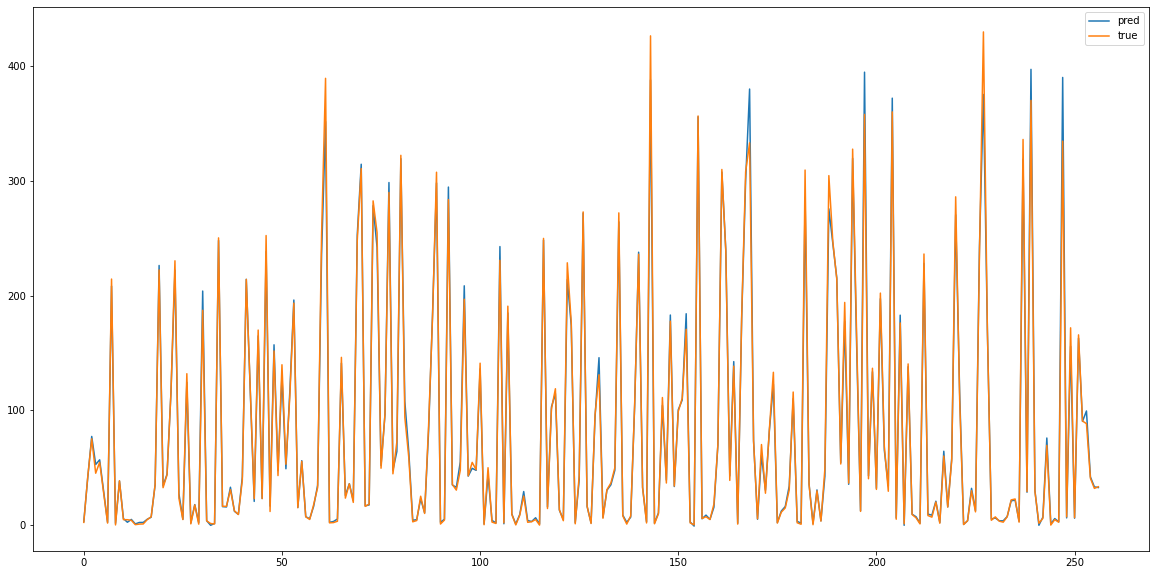

In [87]:
train_x, val_x, train_y, val_y = train_test_split(train_col, train_target, test_size=0.2, random_state=32)

model = lgb.LGBMRegressor(objective= "regression", boosting_type='gbdt', random_state = 32, n_estimators=50000, learning_rate= 0.005,  early_stopping_rounds=1000)
model.fit(train_x, train_y, eval_set = [(val_x, val_y)], eval_metric='l1')

val_pred = model.predict(val_x)
plt.figure(figsize=(20,10))
plt.plot(np.array(val_pred),label = "pred")
plt.plot(np.array(val_y),label = "true")
plt.legend()
plt.show()

Epoch 1/1000
32/32 [==============================] - 1s 7ms/step - loss: 79.4409 - mean_absolute_error: 79.4409 - val_loss: 84.3841 - val_mean_absolute_error: 78.8380
Epoch 2/1000
32/32 [==============================] - 0s 3ms/step - loss: 77.4073 - mean_absolute_error: 77.4073 - val_loss: 79.7957 - val_mean_absolute_error: 73.8677
Epoch 3/1000
32/32 [==============================] - 0s 3ms/step - loss: 69.5620 - mean_absolute_error: 69.5620 - val_loss: 67.1406 - val_mean_absolute_error: 60.8303
Epoch 4/1000
32/32 [==============================] - 0s 5ms/step - loss: 54.0878 - mean_absolute_error: 54.0878 - val_loss: 47.1322 - val_mean_absolute_error: 43.9787
Epoch 5/1000
32/32 [==============================] - 0s 4ms/step - loss: 37.5490 - mean_absolute_error: 37.5490 - val_loss: 32.3229 - val_mean_absolute_error: 29.7540
Epoch 6/1000
32/32 [==============================] - 0s 3ms/step - loss: 24.2253 - mean_absolute_error: 24.2253 - val_loss: 18.5854 - val_mean_absolute_error: 

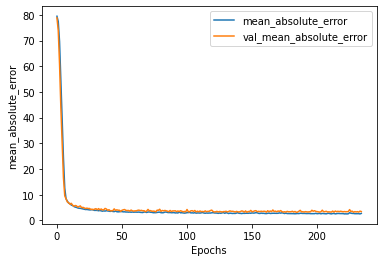

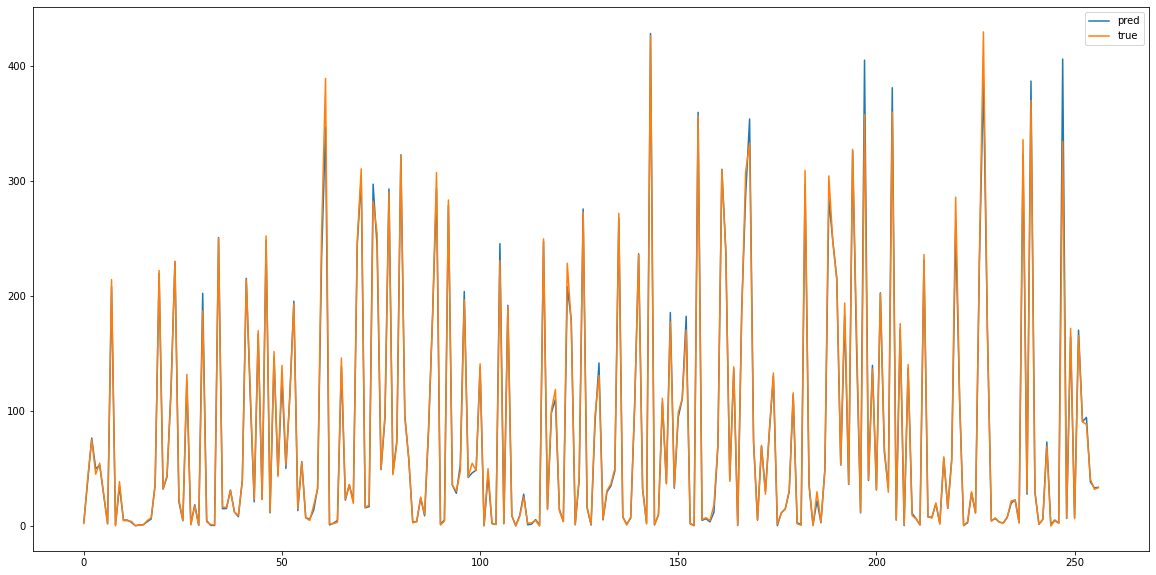

In [90]:
from keras.callbacks import EarlyStopping


def scale_datasets(x_train, x_test):
  """
  Standard Scale test and train data
  Z - Score normalization
  """
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(
      standard_scaler.fit_transform(x_train),
      columns=x_train.columns
  )
  x_test_scaled = pd.DataFrame(
      standard_scaler.transform(x_test),
      columns = x_test.columns
  )
  return x_train_scaled, x_test_scaled

train_scaled, test_scaled = scale_datasets(train_col, test_col)

train_x, val_x, train_y, val_y = train_test_split(train_scaled, train_target, test_size=0.2, random_state=32)


# Creating model using the Sequential in tensorflow
def build_model_using_sequential():
  model = Sequential([
    Dense(100, kernel_initializer='normal', activation='relu'),
    Dense(50, kernel_initializer='normal', activation='relu'),
    Dense(25, kernel_initializer='normal', activation='relu'),
    Dense(1, kernel_initializer='normal', activation='linear')
  ])
  return model
# build the model
model = build_model_using_sequential()

# loss function
mae = MeanAbsoluteError()
model.compile(
    loss=mae, 
    optimizer=Adam(learning_rate=0.001), 
    metrics=[mae]
)

early_stopping_monitor = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=50,
    verbose=0,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)

# train the model
history = model.fit(
    train_x, 
    train_y, 
    epochs=1000, 
    batch_size=32,
    validation_data=(val_x, val_y),
    callbacks=[early_stopping_monitor]
)


def plot_history(history, key):
  plt.plot(history.history[key])
  plt.plot(history.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history, 'mean_absolute_error')


val_pred = model.predict(val_x)
plt.figure(figsize=(20,10))
plt.plot(np.array(val_pred),label = "pred")
plt.plot(np.array(val_y),label = "true")
plt.legend()
plt.show()


In [91]:
result = model.predict(test_scaled)
# data = pd.DataFrame(result, columns = ['weight'])
# data['image'] = test_df['이미지']

# groupdata = data.groupby('image').mean().reset_index()

submission = pd.read_csv('./sample_submission.csv')
# submission['leaf_weight'] = groupdata['weight']
submission['leaf_weight'] = result
submission.to_csv('./tabsubmit.csv', index=False)

In [68]:
CNN = pd.read_csv('./submit.csv')
CATBOOST = pd.read_csv('./tabsubmit.csv')
submission_final = pd.read_csv('./sample_submission.csv')
submission_final['leaf_weight'] = (CNN['leaf_weight'] * 0.5 + CATBOOST['leaf_weight'] * 0.5)
submission_final.to_csv('submission_combined_CNN_catboost.csv', index=False)